# Search stocks

In [35]:
import sys
!{sys.executable} -m pip install pandas_datareader yfinance matplotlib

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [36]:
import pandas as pd
from pandas import DataFrame
import math
from pandas_datareader import data as pdr
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
yf.pdr_override()


In [37]:
df = pd.read_html('https://en.wikipedia.org/wiki/E-mini')[0]
tickers = df['Ticker symbol'].values.tolist()
tickers

['ES',
 'MES',
 'EME',
 'YM',
 'MYM',
 'EMD',
 'SMC',
 'NQ',
 'MNQ',
 'QCN',
 'BIO',
 'EMF',
 'FXN',
 'J7',
 'E7',
 'XAY',
 'XAP',
 'XAF',
 'XAV',
 'XAI',
 'XAB',
 'XAK',
 'XAU',
 'YC',
 'YK',
 'YW',
 'QM',
 'QG',
 'QH',
 'QU',
 'QO',
 '6Q',
 'QC',
 'RF',
 'TF',
 'M2K']

In [38]:
#f = ES,NQ,YM,TF,6A,6B,6C,6E,6J,6N,DX,6S,CL,QM,NG,HO,GC,YG,SI,YI,HG,PL,6A,ACD,AJY,ANE,6L,6B,PJY,PSF,MP,6C,CJY,6E,EC,E7,EAD,RP,RY,RF,6J,J7,KRW,6M,MP,6N,NOK,6R,6Z,SEK,6S,SJY,DX,CL,BZ,EH,HO,NN,NG,RB,UX,CB,CC,CJ,KC,KT,TT,CT,DY,LB,LBS,DC,GDK,GNF,OJ,YO,SB,SF


futures = [
"ES",
"YM",
"NQ",
"RTY",
"ZB",
"ZN",
"ZF",
"ZT",
"GC",
"MGC",
"SI",
"SIL",
"PL",
"HG",
"PA",
"CL",
"HO",
"NG",
"RB",
"BZ",
"B0",
"ZC",
"ZO",
"KE",
"ZR",
"ZM",
"ZL",
"ZS",
"GF",
"HE",
"LE",
"CC",
"KC",
"CT",
"LBS",
"OJ",
"SB",
"VX",
"BR"
]
futures = set(map(lambda x: x + '=F', futures + tickers))

ma_count = 21
ma_count1 = 21*5

futures


{'6Q=F',
 'B0=F',
 'BIO=F',
 'BR=F',
 'BZ=F',
 'CC=F',
 'CL=F',
 'CT=F',
 'E7=F',
 'EMD=F',
 'EME=F',
 'EMF=F',
 'ES=F',
 'FXN=F',
 'GC=F',
 'GF=F',
 'HE=F',
 'HG=F',
 'HO=F',
 'J7=F',
 'KC=F',
 'KE=F',
 'LBS=F',
 'LE=F',
 'M2K=F',
 'MES=F',
 'MGC=F',
 'MNQ=F',
 'MYM=F',
 'NG=F',
 'NQ=F',
 'OJ=F',
 'PA=F',
 'PL=F',
 'QC=F',
 'QCN=F',
 'QG=F',
 'QH=F',
 'QM=F',
 'QO=F',
 'QU=F',
 'RB=F',
 'RF=F',
 'RTY=F',
 'SB=F',
 'SI=F',
 'SIL=F',
 'SMC=F',
 'TF=F',
 'VX=F',
 'XAB=F',
 'XAF=F',
 'XAI=F',
 'XAK=F',
 'XAP=F',
 'XAU=F',
 'XAV=F',
 'XAY=F',
 'YC=F',
 'YK=F',
 'YM=F',
 'YW=F',
 'ZB=F',
 'ZC=F',
 'ZF=F',
 'ZL=F',
 'ZM=F',
 'ZN=F',
 'ZO=F',
 'ZR=F',
 'ZS=F',
 'ZT=F'}

In [39]:
data = pdr.get_data_yahoo(futures, start=dt.datetime(2019,1,1), end=dt.date.today())['Close']
data.tail()


[*********************100%***********************]  72 of 72 completed

17 Failed downloads:
- QCN=F: No data found, symbol may be delisted
- 6Q=F: No data found, symbol may be delisted
- BR=F: No data found for this date range, symbol may be delisted
- EMF=F: No data found, symbol may be delisted
- YC=F: No data found for this date range, symbol may be delisted
- E7=F: No data found for this date range, symbol may be delisted
- EMD=F: No data found for this date range, symbol may be delisted
- SMC=F: No data found, symbol may be delisted
- FXN=F: No data found, symbol may be delisted
- J7=F: No data found for this date range, symbol may be delisted
- TF=F: No data found, symbol may be delisted
- XAY=F: No data found for this date range, symbol may be delisted
- YW=F: No data found for this date range, symbol may be delisted
- VX=F: No data found, symbol may be delisted
- YK=F: No data found for this date range, symbol may be delisted
- EME=F: No data found, symbol may be delisted
- B0

,6Q=F,B0=F,BIO=F,BR=F,BZ=F,CC=F,CL=F,CT=F,E7=F,EMD=F,...,ZB=F,ZC=F,ZF=F,ZL=F,ZM=F,ZN=F,ZO=F,ZR=F,ZS=F,ZT=F
Date,,,,,,,,,,,,,,,,,,,,,
2022-07-06 00:00:00,NaN,NaN,3932.5,NaN,100.690002,2307.0,98.529999,94.690002,NaN,NaN,...,139.78125,744.25,112.554688,60.220001,462.600006,119.046875,666.50,1592.5,1580.25,105.000000
2022-07-07 00:00:00,NaN,NaN,4023.0,NaN,104.650002,2305.0,102.730003,98.120003,NaN,NaN,...,138.40625,747.00,112.078125,63.169998,470.000000,118.265625,660.50,1613.5,1591.25,104.843750
2022-07-08 00:00:00,NaN,NaN,4047.0,NaN,107.019997,2269.0,104.790001,102.610001,NaN,NaN,...,136.84375,778.25,111.664062,64.070000,478.399994,117.625000,686.75,1620.0,1630.25,104.671875
2022-07-11 00:00:00,NaN,NaN,3967.0,NaN,107.099998,2324.0,104.089996,102.440002,NaN,NaN,...,138.71875,781.25,112.070312,65.209999,482.899994,118.375000,686.25,1630.5,1641.00,104.800781
2022-07-12 00:00:00,NaN,NaN,3962.0,NaN,99.489998,2305.0,95.839996,98.440002,NaN,NaN,...,139.34375,732.75,112.226562,61.410000,478.700012,118.656250,654.00,1620.5,1592.75,104.863281


In [40]:
ma = data.rolling(window=ma_count).mean()
ma_pers = data.div(ma).mul(100).sub(100)

ma_week = data.rolling(window=ma_count1).mean()
ma_week_pers = data.div(ma_week).mul(100).sub(100)

df_prep = []
tickers = ma_pers.columns.values.tolist()
for ticker in tickers:
    ma_last = None
    counter = 0
    ma_d = 0
    ma_w = 0
    ma_last = 0
    date = None
    for index, row in ma_pers.iterrows():
        ma_d = ma_pers[ticker][index]
        ma_w = ma_week_pers[ticker][index]
        if ma_d < ma_w:
            date = index
            counter += 1
            ma_last= ma_d - ma_w
        else:
            ma_last = 0
            counter=0
    df_prep.append([ticker, counter, ma_last, ma_count, ma_count1, ma_d, ma_w, date, "cross"]) 
df = DataFrame(df_prep, columns=['name', 'count', 'ma_diff', 'ma_size', 'ma_size1', 'ma_daily', 'ma_weekly', 'last_date', 'ma_type'])\
    .sort_values(by=['count', 'ma_diff'], ascending=False)

lead_comps_df = df[df['count'] >= 2].drop_duplicates(subset=['name'])
lead_comps = lead_comps_df['name'].values.tolist()
lead_comps_df

,name,count,ma_diff,ma_size,ma_size1,ma_daily,ma_weekly,last_date,ma_type
18,HO=F,130,-7.182223,21,105,-10.743242,-3.561019,2022-07-12,cross
38,QM=F,125,-1.610332,21,105,-11.308074,-9.697742,2022-07-12,cross
6,CL=F,125,-1.638646,21,105,-11.419395,-9.780749,2022-07-12,cross
4,BZ=F,125,-2.049891,21,105,-11.325353,-9.275462,2022-07-12,cross
41,RB=F,123,-6.056509,21,105,-11.987201,-5.930693,2022-07-12,cross
39,QO=F,91,-2.870257,21,105,-0.825619,2.044639,2022-07-12,cross
36,QG=F,83,-0.676437,21,105,-5.583391,-4.906953,2022-07-12,cross
29,NG=F,83,-0.684089,21,105,-5.600938,-4.916849,2022-07-12,cross


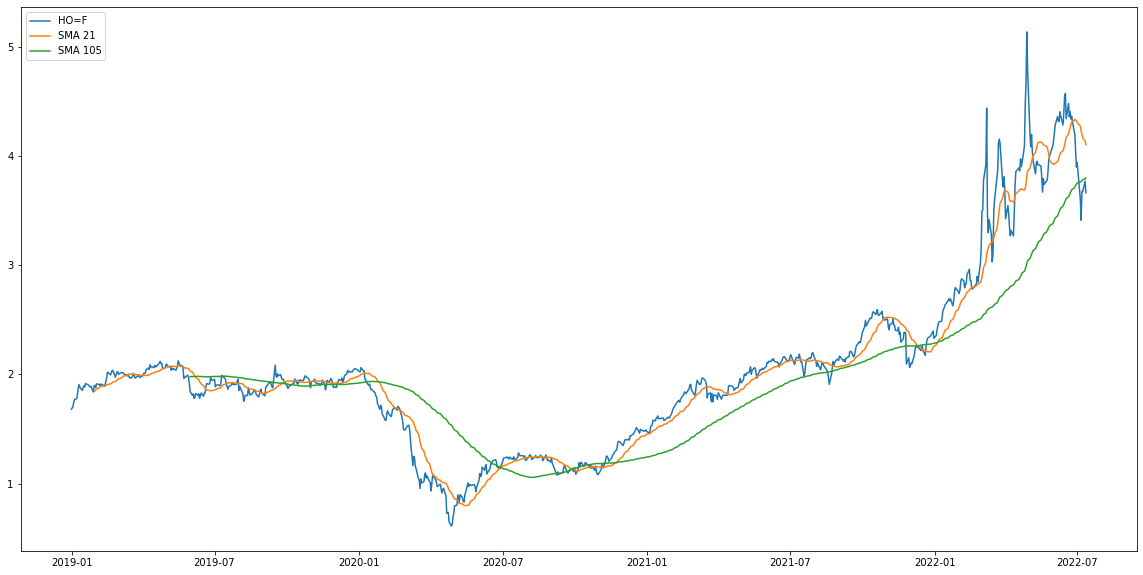

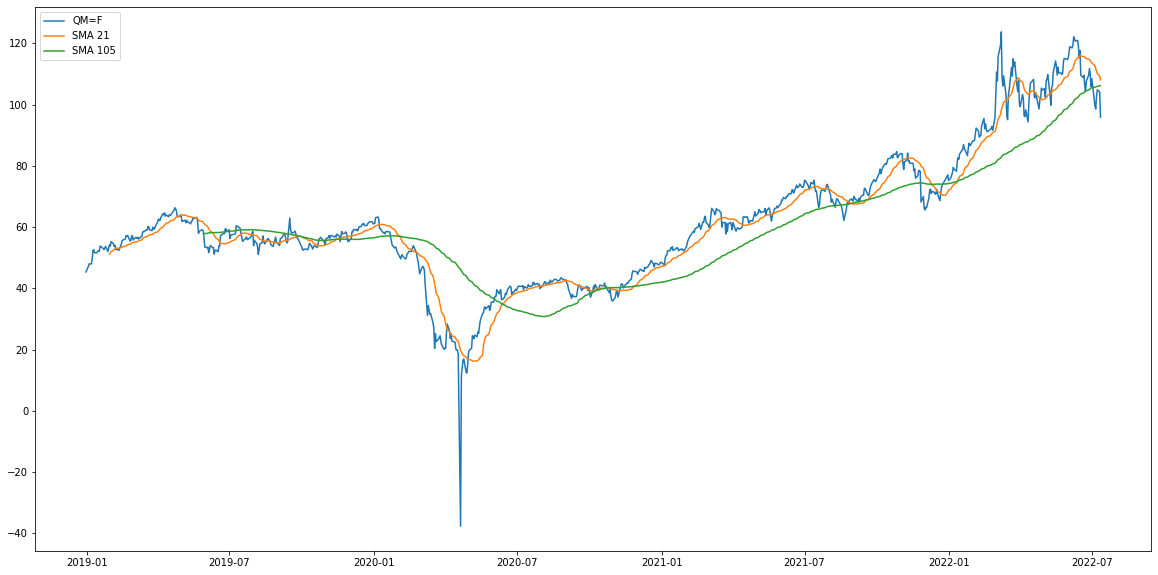

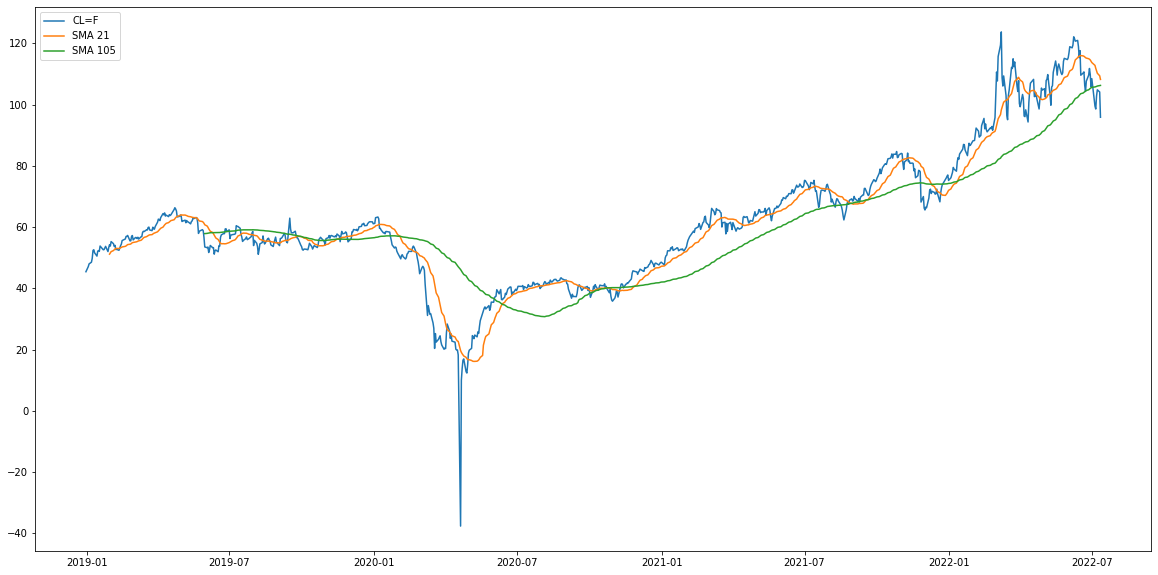

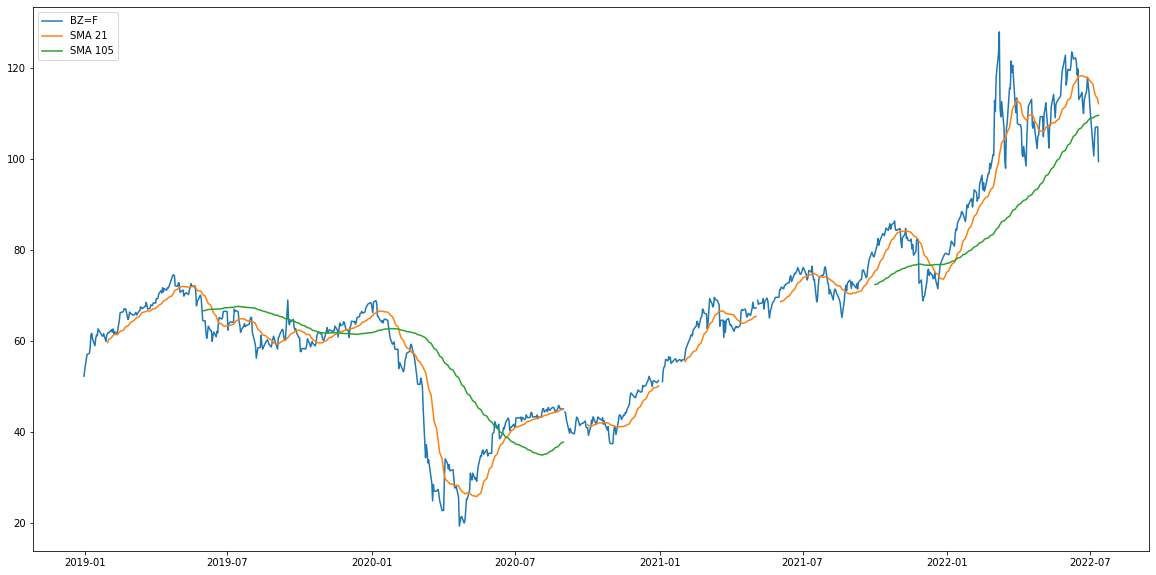

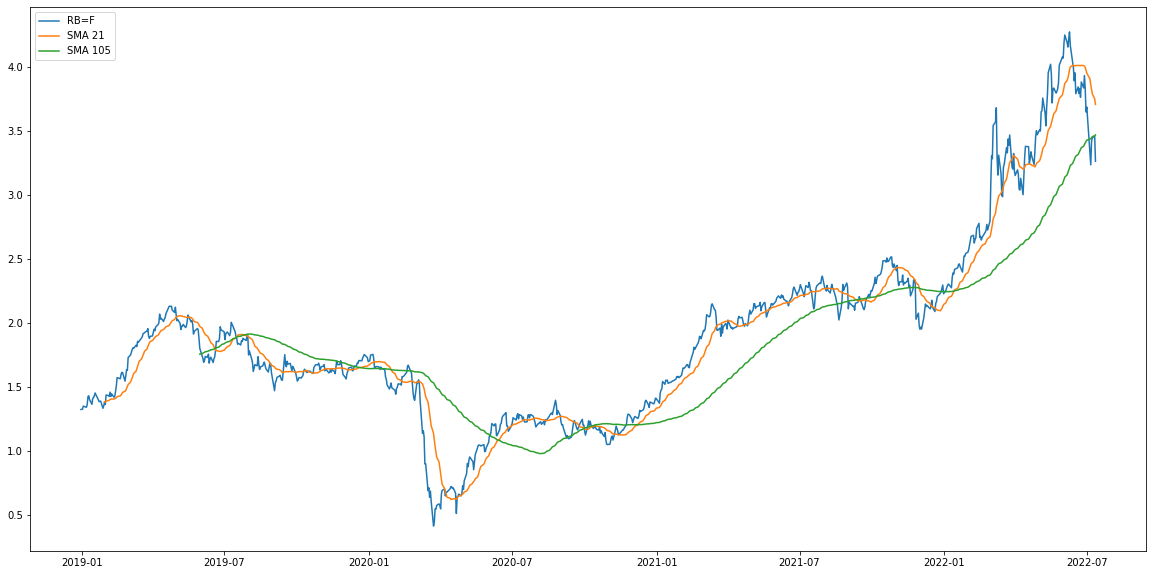

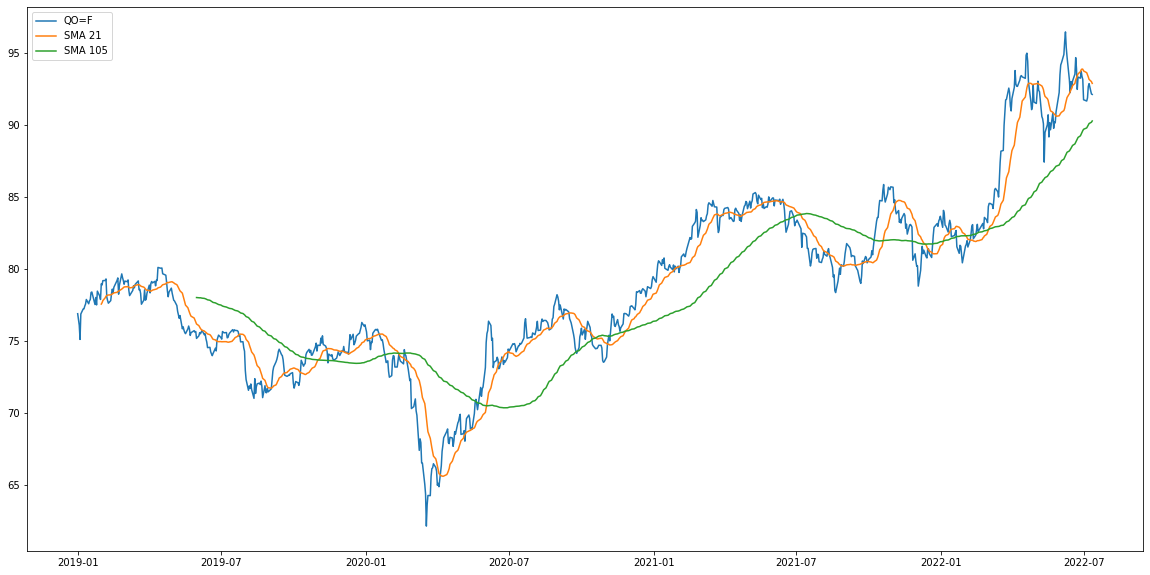

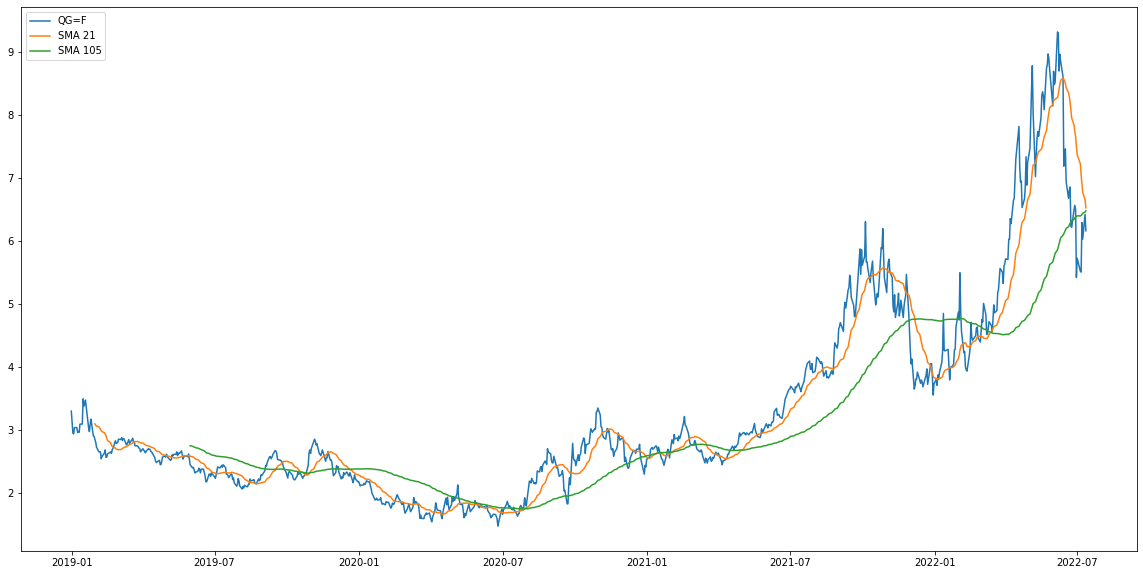

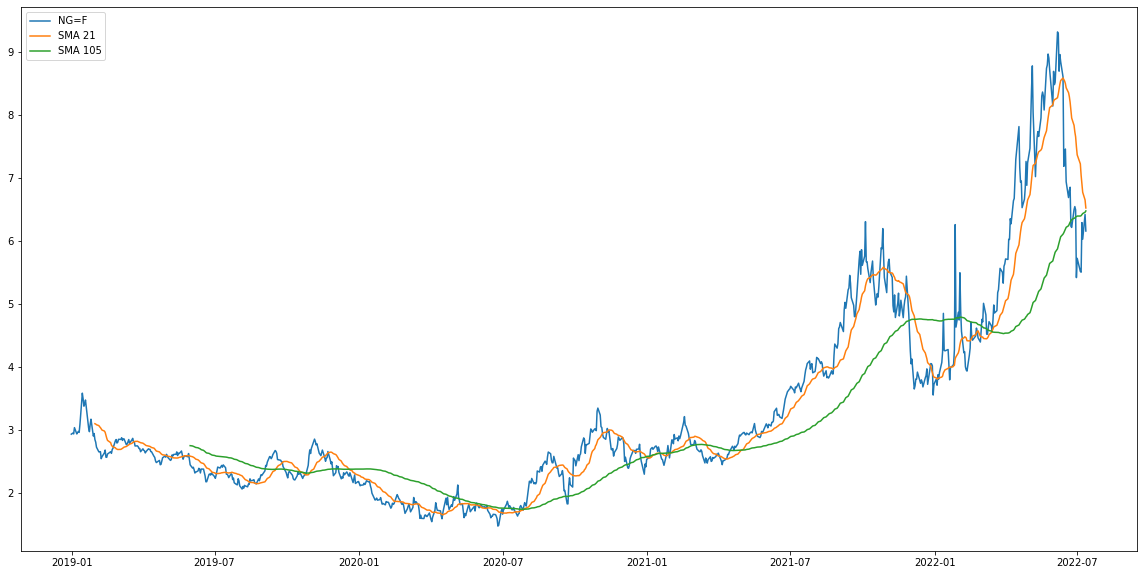

In [41]:
for quote in lead_comps:
    fig, ax = plt.subplots(figsize=(20, 10))
    plt.plot(data[quote], label=quote);
    plt.plot(ma[quote], label = f'SMA {ma_count}');
    plt.plot(ma_week[quote], label = f'SMA {ma_count1}');
    plt.legend(loc=2);